<a href="https://colab.research.google.com/github/sk2003hw/Hist-TrOCR/blob/main/Hist_TrOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TrOCR on Historical Text
TrOCR- Transformer-based model is fine-tuned on historical data ([ARDIS Dataset](https://drive.google.com/drive/folders/1EN0hbqE1EjXCp6jZVqB-7DdWPTvDk63a?usp=share_link) and [Washington Database](https://drive.google.com/drive/folders/1I2s3rrfOKncPAamB6PCL7cSwe1ykHk_d?usp=share_link)). The code is also in a GitHub repository at [this link](https://github.com/sk2003hw/Hist-TrOCR).

In [ ]:
!nvidia-smi # to see the details of the machine/device being used

Sun Mar 12 22:42:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    51W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Google Drive Connection
The Google Colab notebook is connected to my Google drive using gdfuse, to enable access to data stored in the drive. The code has been used from [the linked StackOverflow page](https://stackoverflow.com/questions/69822304/google-colab-google-drive-can%C2%B4t-be-mounted-anymore-browser-popup-google-dri). Colab was updated during the last stages of the project to mount the Drive of the user who is running the code.

In [ ]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&

In [ ]:
!sudo apt-get install -qq w3m
!xdg-settings set default-web-browser w3m.desktop
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package w3m.
(Reading database ... 128280 files and directories currently installed.)
Preparing to unpack .../w3m_0.5.3-37ubuntu0.1_amd64.deb ...
Unpacking w3m (0.5.3-37ubuntu0.1) ...
Setting up w3m (0.5.3-37ubuntu0.1) ...
Processing triggers for man-db (2.9.1-1) ...
Processing triggers for mime-support (3.64ubuntu1) ...
/content
/content/drive
/content
/
Access token retrieved correctly.


## Setup
Making necessary installations and imports required for the project and configuring the model.

In [ ]:
!pip install transformers # installing the Transformers library from HuggingFace
!pip install torch # installing PyTorch framework
!pip install jiwer # installing jiwer for loading CER metric
!pip install evaluate # installing the Evaluate library from HuggingFace to use the CER metric for evaluation
!pip install -q gradio # installing Gradio to create an interactive demo of the model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 104.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Importing necessary packages
import pandas as pd # pandas for reading csv files
import matplotlib.pyplot as plt # for creating plots
from copy import deepcopy # to create exact copy of a variable at another memory location
from sklearn.model_selection import train_test_split # for splitting the data into train, validation and test sets
import torch # PyTorch used for executing deep learning functions
# to store the data and ground truths to be used by the model, loader is an iterable over the Datasets created, the last one is to concatenate Dataset objects
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from PIL import Image, ImageTk # to display the image from the encoded pixels
from transformers import TrOCRProcessor, VisionEncoderDecoderModel # importing the TrOCR processor representing the visual feature extrcator and tokenizer of the TrOCR model, and the TrOCR model
import evaluate # for using the CER metric
from tqdm.notebook import tqdm # to display the progress bar, improves experience and readability (referred to https://github.com/tqdm/tqdm#usage)
import gradio as gr # to create a demo of the model which can be deployed on HuggingFace Spaces
import time # to use in calculating the runtime

In [ ]:
!huggingface-cli login # to login to huggingface to import the already fine-tuned model and to push to the model repo created for this finetuned model


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid.
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
# Base code has been referred to from the official website of 
# the trocr-base-handwritten model- https://huggingface.co/microsoft/trocr-base-handwritten

# to create an object of TrOCRProcessor with the given pre-trained model trocr-base-handwritten 
# which wraps ViTFeatureExtractor (to normalize input images) and 
# RobertaTokenizer (to encode and decode text to and from input_ids created) as one entity
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")

# loading and initializing with the pre-trained base trocr model - used for initial training
# model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

# created after training the fine-tuned model after few runs of this code
custom_model = VisionEncoderDecoderModel.from_pretrained("sk2003/hist-trocr") 

# ADAM optimizer with decaying weights and the learning rate is set to 0.00005 which has been found to be most-used for Transformers
optimizer = torch.optim.AdamW(custom_model.parameters(), lr=5e-5)
cer_metric = evaluate.load("cer") # CER metric is loaded from the Evaluate library
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # the device to load the data and model one (CPU/GPU)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # setting the device to be the GPU if it is avaliable or else, the CPU

In [ ]:
# configuring the base_handwritten model and setting undefined parameters, used initially before the custom_model was made
# the decoder input_ids require the start and pad tokens, they are created by shifting the input to the right once
def initialize_model(model):
  model.config.decoder_start_token_id = processor.tokenizer.cls_token_id # id (=0) of the class token- <s> used as the first token after the inputs are shifted to the right for the decoder
  model.config.pad_token_id = processor.tokenizer.pad_token_id # id (=1) of the pad token- <pad>
  model.config.vocab_size = model.config.decoder.vocab_size # language modelling vocabulary size is set to default value of the decoder of the model (=50625)

  # sequence generation parameters associated with beam search (https://huggingface.co/blog/how-to-generate)
  model.config.eos_token_id = processor.tokenizer.sep_token_id # id (=2) of the separator token- </s> that is used at the end of the string, originally undefined
  model.config.max_length = 64 # maximum length to be used by the text generation function, originally 20
  # for below value- (https://machinelearningmastery.com/beam-search-decoder-natural-language-processing/#:~:text=Common%20beam%20width%20values%20are,better%20matching%20a%20target%20sequence.)
  model.config.num_beams = 5 # number of beams in beam search, beam width - number of sequences to consider while picking the one with the highest probablity, originally 1 (so only greedy search)
  model.config.early_stopping = True # beam search is stopped when 5(num_beams) sentences are done at a time (batch), originally False
  model.config.no_repeat_ngram_size = 3 # ngrams of size 3 can occur only once, to avoid word repetitions
  return model

In [ ]:
# model = initialize_model(model) # basic imported model
print("Model configuration:\n",custom_model.config) # snapshot of all the default and manually configured values

Model configuration:
 VisionEncoderDecoderConfig {
  "_commit_hash": "1953761f0b81de31d5921b2063b81cb65e4a8e57",
  "_name_or_path": "sk2003/hist-trocr",
  "architectures": [
    "VisionEncoderDecoderModel"
  ],
  "decoder": {
    "_name_or_path": "",
    "activation_dropout": 0.0,
    "activation_function": "gelu",
    "add_cross_attention": true,
    "architectures": null,
    "attention_dropout": 0.0,
    "bad_words_ids": null,
    "begin_suppress_tokens": null,
    "bos_token_id": 0,
    "chunk_size_feed_forward": 0,
    "classifier_dropout": 0.0,
    "cross_attention_hidden_size": 768,
    "d_model": 1024,
    "decoder_attention_heads": 16,
    "decoder_ffn_dim": 4096,
    "decoder_layerdrop": 0.0,
    "decoder_layers": 12,
    "decoder_start_token_id": 2,
    "diversity_penalty": 0.0,
    "do_sample": false,
    "dropout": 0.1,
    "early_stopping": false,
    "encoder_no_repeat_ngram_size": 0,
    "eos_token_id": 2,
    "exponential_decay_length_penalty": null,
    "finetuning_ta

In [ ]:
print("The structure of the model used:\n",custom_model.parameters) # displaying layers used, activation functions, and other details of the model

The structure of the model used:
 <bound method Module.parameters of VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=False)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=False)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (inter

In [ ]:
# Displaying details regarding the processor used
print("Image processor used:\n",processor.image_processor) # the visual feature extractor used
print("\nInput of the image processor: ",processor.image_processor.model_input_names) # input name of the image processor
print("\nTokenizer used:\n",processor.tokenizer) # details of the tokenizer
print("\nInput of the tokenizer:",processor.tokenizer.model_input_names) # input name of the tokenizer

Image processor used:
 ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 384,
    "width": 384
  }
}


Input of the image processor:  ['pixel_values']

Tokenizer used:
 RobertaTokenizerFast(name_or_path='microsoft/trocr-base-handwritten', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'sep_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalize

## Exploratory Data Analysis and Dataframe Preparation
Understanding and cleaning the data to be made useful for processing by the model.

### Washington Database
 Created from George Washington Papers at the Library of Congress, USA.  
 Files used are- ground_truth/ground_truths.csv for the ground truths and data/line_and_word_images_normalized for the images.

#### Pre-processing

In [ ]:
# Reading the ground truth labels associated with the line images from the Washington Database
data_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/washingtondb-v1.0/ground_truth/ground_truths.csv', header=None)
images_location_1 = '/content/drive/MyDrive/Colab Notebooks/washingtondb-v1.0/data/line_and_word_images_normalized/' # path of the image folder
data_1.head() # glimpse of first 5 elements in the dataframe

,0,1
0,270-01,s_2-s_7-s_0-s_pt|L-e-t-t-e-r-s-s_cm|O-r-d-e-r-...
1,270-03,o-n-l-y|f-o-r|t-h-e|p-u-b-l-i-c-k|u-s-e-s_cm|u...
2,270-04,l-a-r|O-r-d-e-r-s|f-r-o-m|m-e-s_pt|Y-o-u|a-r-e...
3,270-05,d-o-w-n|a|B-a-r-r-e-l|o-f|F-l-i-n-t-s|w-i-t-h|...
4,270-06,W-i-n-c-h-e-s-t-e-r-s_cm|a-n-d|a-b-o-u-t|t-w-o...


In [ ]:
data_1.info() # to examine the types of the data in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       756 non-null    object
 1   1       756 non-null    object
dtypes: object(2)
memory usage: 11.9+ KB


In [ ]:
# Changing the names of the columns in the same dataframe for easy referrence to the columns
data_1.rename(columns={0: "file_name", 1: "text"}, inplace=True)
data_1.columns # to see the column/attribute names

Index(['file_name', 'text'], dtype='object')

In [ ]:
# adding 'png' to the end of the file names read from the csv 
# so as the contents of the column contain the file names with the extension to refer to the images
# as all images are png files
data_1['file_name'] = [x + ".png" for x in data_1['file_name']]
print(data_1['file_name'])

0         270-01.png
1         270-03.png
2         270-04.png
3         270-05.png
4         270-06.png
           ...      
751    270-18-03.png
752    270-18-04.png
753    270-18-05.png
754    270-18-06.png
755    270-19-01.png
Name: file_name, Length: 756, dtype: object


In [ ]:
# to get the special characters which are prefixed by 's_' (special charcaters)
specials = deepcopy(data_1) # making a copy of the data_1 dataframe so that steps in this cell do not affect the original dataframe
specials['text'] = specials['text'].str.replace('|', '-', regex = False) # all | used to represent spaces are replaced with -
specials = specials[specials['text'].str.contains('s_')]['text'].str.split('-') # the strings are split by - to extract records with '_s'
s_chars = [] # for storing the list of 'special' characters detected
# iterating over the contents of the specials individually to extract only the special characters into s_chars list
for lists in specials:
  for chars in lists:
    if 's_' in chars:
      s_chars.append(chars)
# keeping only the unique elements from s_chars by making it a set 
# but it is converted back to a list as they are subscriptable so
# would enable access to elements as specefied indices
s_chars = list(set(s_chars)) 
print("Special characters:\n",s_chars)

Special characters:
 ['s_1st', 's_pt', 's_et', 's_1th', 's_8', 's_5th', 's_9', 's_2', 's_8th', 's_3rd', 's_3', 's_2nd', 's_1', 's_6', 's_sl', 's_lb', 's_9th', 's_0th', 's_qo', 's_br', 's_bl', 's_7th', 's_4', 's_s', 's_6th', 's_sq', 's_5', 's_7', 's_mi', 's_qt', 's_GW', 's_cm', 's_0']


In [ ]:
# all words in the ground truth have been separated by bars (|) so they are converted back to spaces
data_1['text'] = data_1['text'].str.replace('|',' ')
# all characters in the ground truth have been separated by hyphens (-) so they are removed
data_1['text'] = data_1['text'].str.replace('-','')
data_1['text'].head # to check out the text column after the hyphens are removed

<ipython-input-14-53684f5380c7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_1['text'] = data_1['text'].str.replace('|',' ')


<bound method NDFrame.head of 0      s_2s_7s_0s_pt Letterss_cm Orders and Instructi...
1      only for the publick uses_cm unles_ss by parti...
2                 lar Orders from mes_pt You are to send
3           down a Barrel of Flints with the Armss_cm to
4           Winchesters_cm and about two thousand weight
                             ...                        
751                                          immediately
752                                                   to
753                                                   go
754                                           Recruis_mi
755                                             tings_sq
Name: text, Length: 756, dtype: object>

s_1st -->  tings_sq and they are allowed until the s_1sts_pt of Des_mi


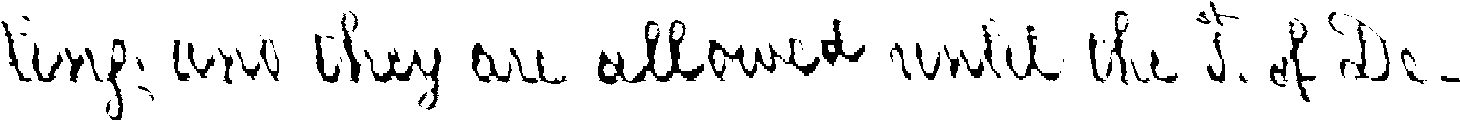




s_pt -->  s_2s_7s_0s_pt Letterss_cm Orders and Instructionss_pt October s_1s_7s_5s_5s_pt


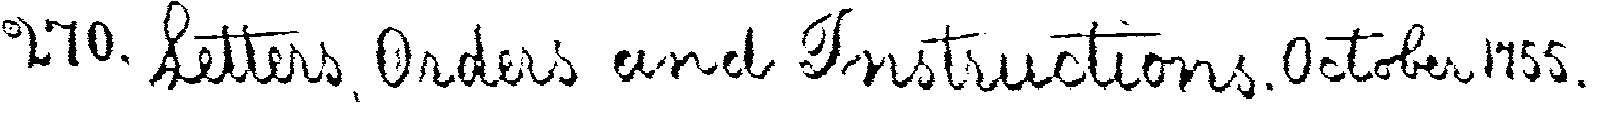




s_et -->  to provide mediciness_cm s_etcs_pt upon the best terms


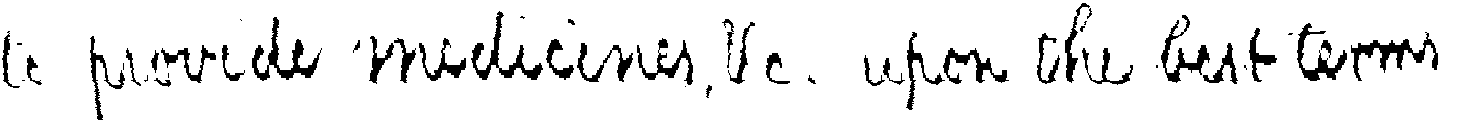




s_1th -->  s_1s_1ths_pt To Sergeant Campbells_cm of the Virginia Regiments_pt


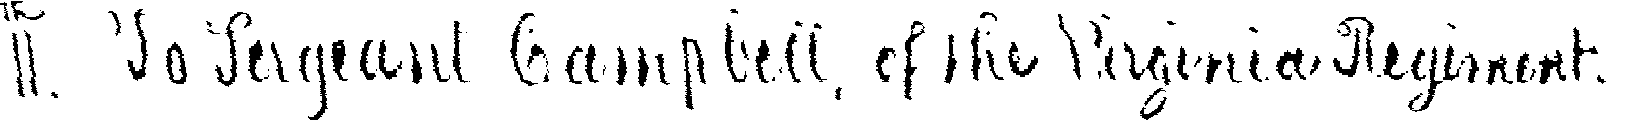




s_8 -->  s_2s_8th Winchesters_qo October s_2s_8ths_cm s_1s_7s_5s_5s_pt


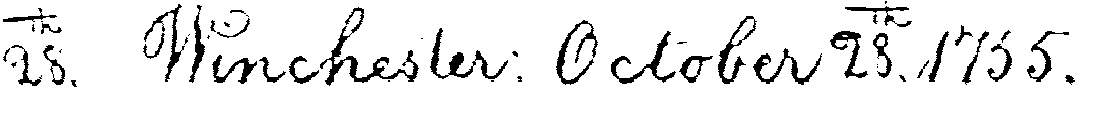




s_5th -->  s_5ths_pt To the Honourable Robert Dinwiddies_cm


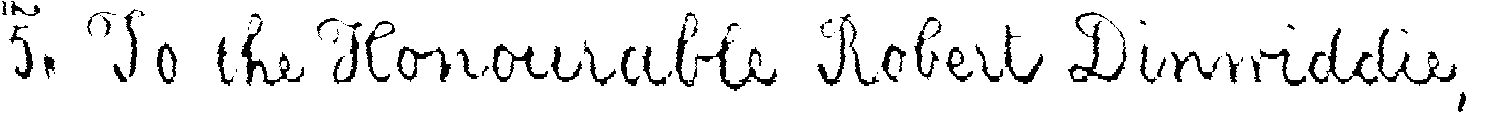




s_9 -->  s_2s_9ths_pt To Lieutenant Colonel Adam Stephens_cm


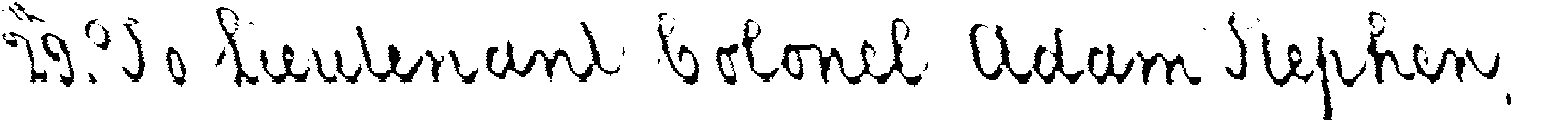




s_2 -->  s_2s_7s_0s_pt Letterss_cm Orders and Instructionss_pt October s_1s_7s_5s_5s_pt


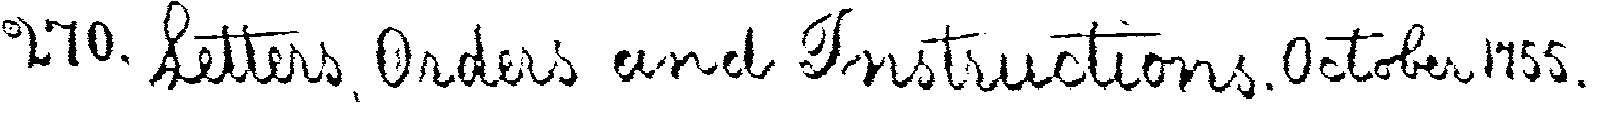




s_8th -->  s_2s_8th Winchesters_qo October s_2s_8ths_cm s_1s_7s_5s_5s_pt


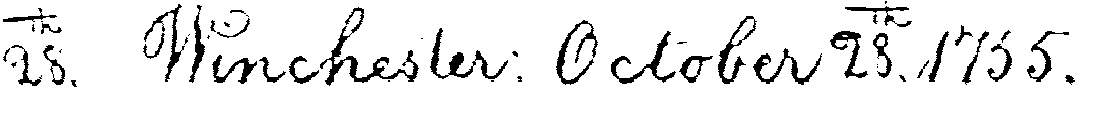




s_3rd -->  ther officers on the s_3rds_pt instant s_etcs_pt


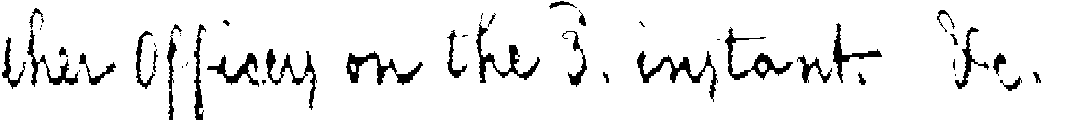




s_3 -->  Letterss_cm Orders and Instructionss_pt October s_1s_7s_5s_5s_pt s_2s_7s_3s_pt


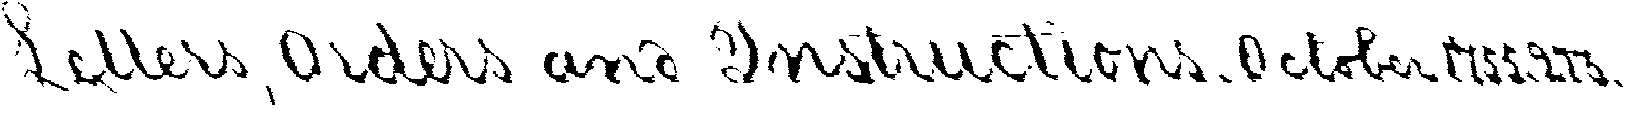




s_2nd -->  s_2s_2nds_pt Parole Bostons_mi Winchesters_qo December s_2s_2nds_pt s_1s_7s_5s_5s_pt


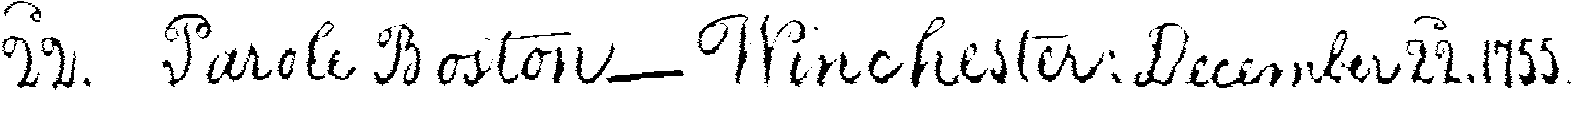




s_1 -->  s_2s_7s_0s_pt Letterss_cm Orders and Instructionss_pt October s_1s_7s_5s_5s_pt


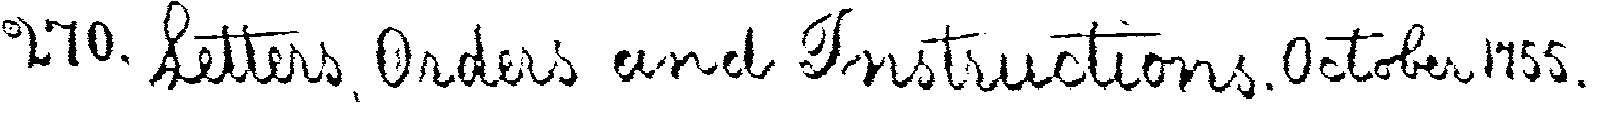




s_6 -->  October s_2s_6ths_pt s_GW


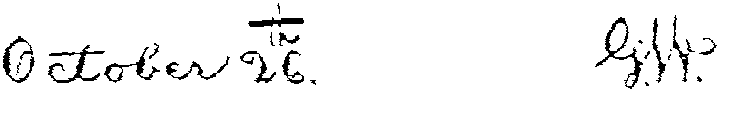




s_sl -->  has been at s_2s_ss_sls_pt per bushels_pt You may procure


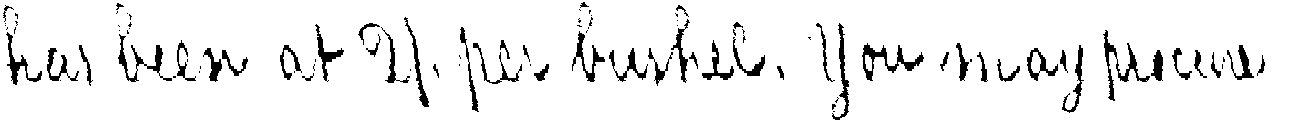




s_lb -->  s_lbs_1s_0s_0s_0 which I wrote for to pay off the Troopss_cm


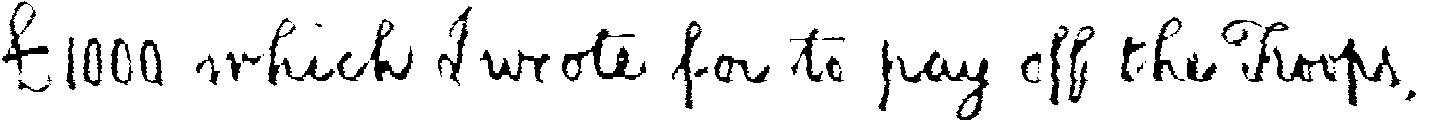




s_9th -->  s_2s_9ths_pt To Lieutenant Colonel Adam Stephens_cm


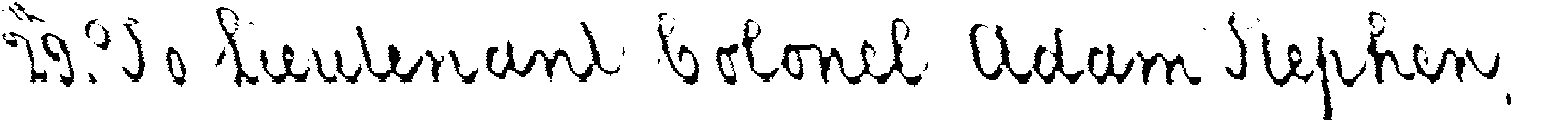




s_0th -->  Octos_pt s_3s_0ths_pt To Sergeant David Wilpers_cm of the Virginia


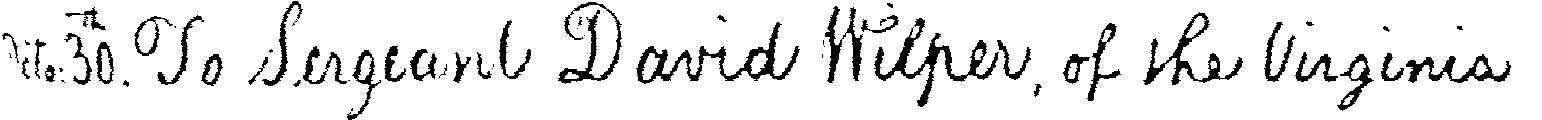




s_qo -->  s_2s_8th Winchesters_qo October s_2s_8ths_cm s_1s_7s_5s_5s_pt


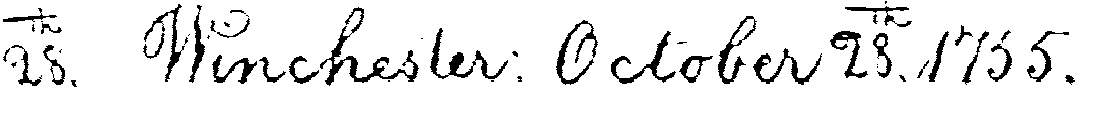




s_br -->  yourself s_blor at least ought to bes_br that your Crime


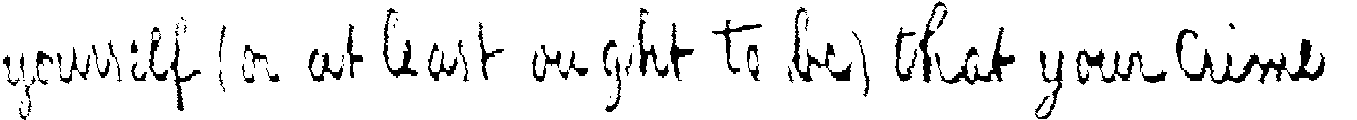




s_bl -->  yourself s_blor at least ought to bes_br that your Crime


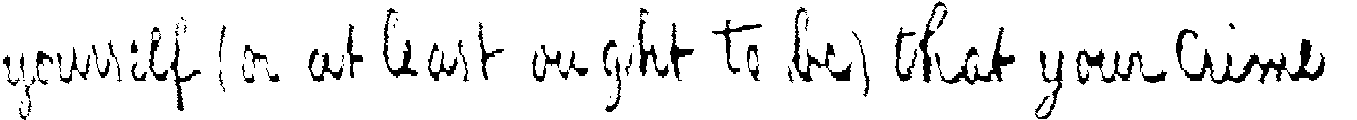




s_7th -->  he was appointed the s_1s_7ths_pt of Septembers_pt


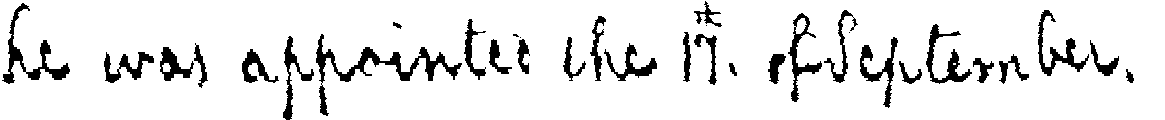




s_4 -->  s_2s_7s_4s_pt Letterss_cm Orders and Instructionss_pt October s_1s_7s_5s_5s_pt


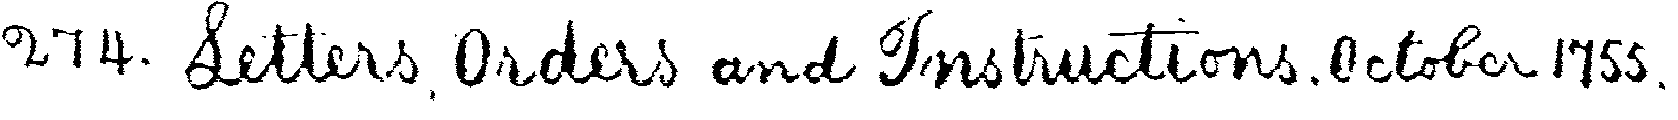




s_s -->  only for the publick uses_cm unles_ss by particus_mi


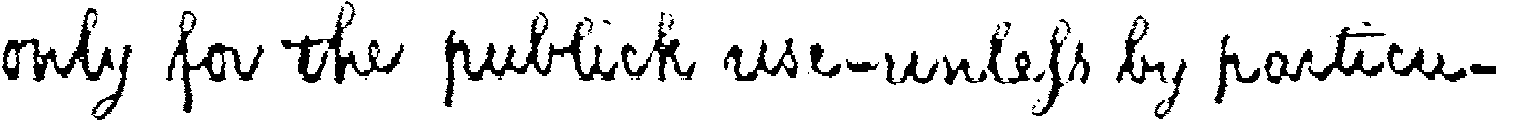




s_6th -->  October s_2s_6ths_pt s_GW


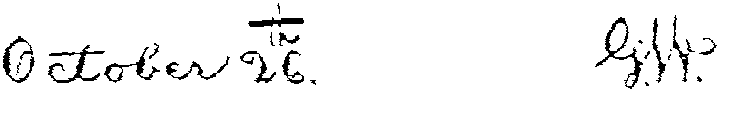




s_sq -->  of Flours_cm for the two Companies of Rangerss_sq


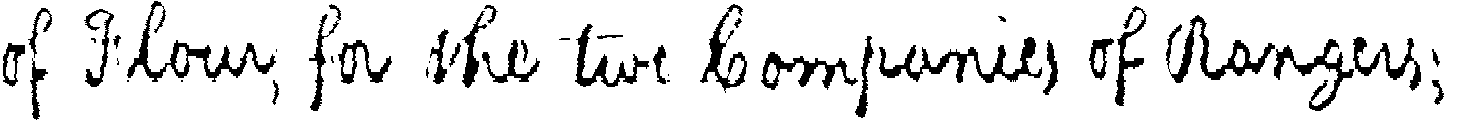




s_5 -->  s_2s_7s_0s_pt Letterss_cm Orders and Instructionss_pt October s_1s_7s_5s_5s_pt


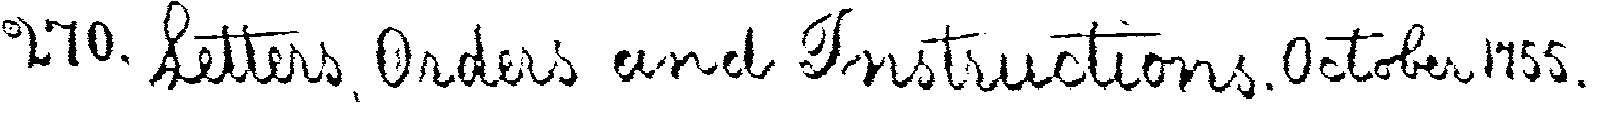




s_7 -->  s_2s_7s_0s_pt Letterss_cm Orders and Instructionss_pt October s_1s_7s_5s_5s_pt


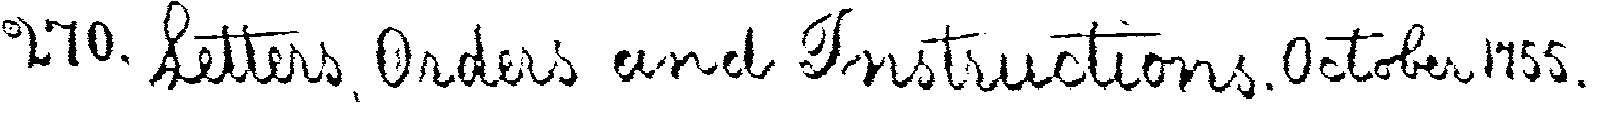




s_mi -->  only for the publick uses_cm unles_ss by particus_mi


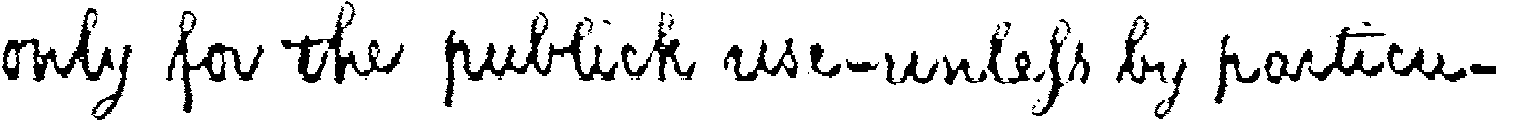




s_qt -->  Cockess_qt Companys_cm at Nicholas Reasmerss_pt


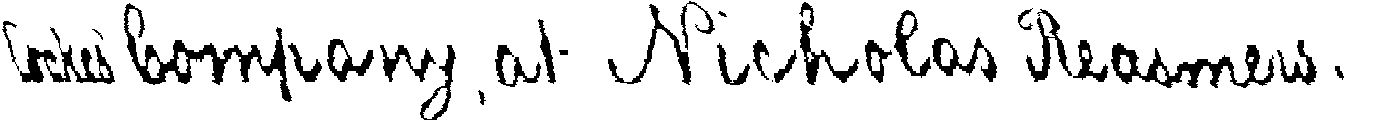




s_GW -->  October s_2s_6ths_pt s_GW


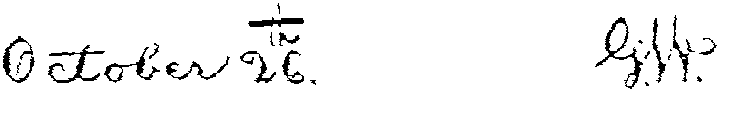




s_cm -->  s_2s_7s_0s_pt Letterss_cm Orders and Instructionss_pt October s_1s_7s_5s_5s_pt


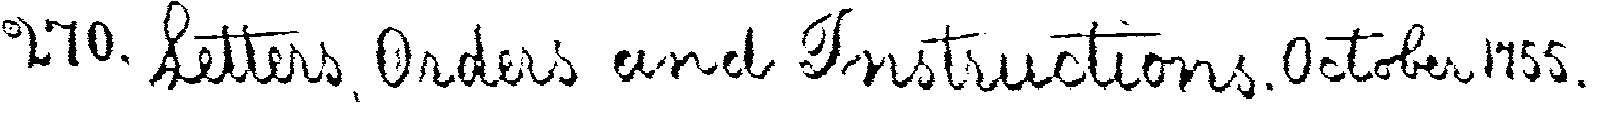




s_0 -->  s_2s_7s_0s_pt Letterss_cm Orders and Instructionss_pt October s_1s_7s_5s_5s_pt


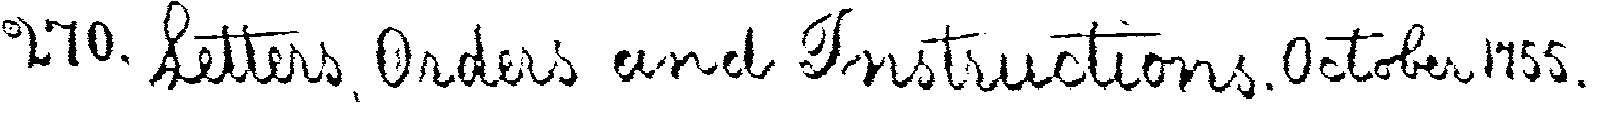

In [ ]:
# for visualizing charcaters prefixed by 's_' to understand the actual character they represent
for special in s_chars:
  df = data_1[data_1['text'].str.contains(special)] # extract instances where the text contains the special set of characters
  df.reset_index(drop=True, inplace=True) # reset the indices to start from 0 for easy reference to the instances
  print(special,"--> ",df['text'][0]) # displaying the text associated with the instance
  image = Image.open(images_location_1 + df['file_name'][0]) # Image object associated with the image of instance is created
  display(image) # displaying the image associated with the instance
  print("\n\n")
  

In [ ]:
# Records with s_sl character are removed as they could not be properly identified 
# As it is only 1 record, not much of a difference will be made
data_1.drop(data_1.index[data_1['text'].str.contains('s_sl')], inplace = True)
data_1.reset_index(drop=True, inplace=True) # resetting the indices of the dataframe after the record is removed
s_chars.remove('s_sl') # this special character is removed from the list of special characters as well

In [ ]:
# the ground truth labels from the csv contain special tokens for some characters
# which are being replaced with their actual versions 
replace_chars = {'s_pt':'.', 's_qo':':','s_mi':'-', 's_bl':'(', 's_br':')', 's_sq':';', 's_s':'s', 's_cm':',', 's_qt':"'", 's_et':'et', 's_lb':'£', 's_GW':'G.W.', 's_0':'0', 's_1':'1', 's_2':'2', 's_3':'3', 's_4':'4', 's_5':'5', 's_6':'6', 's_7':'7', 's_8':'8', 's_9':'9' }
# iterating over the dictionary to replace the keys' values in the records with the values from the dictionary
for char in replace_chars.keys():
  data_1['text'] = data_1['text'].str.replace(char, replace_chars[char])

data_1.head() # glimpse of the dataframe

,file_name,text
0,270-01.png,"270. Letters, Orders and Instructions. October..."
1,270-03.png,"only for the publick use, unless by particu-"
2,270-04.png,lar Orders from me. You are to send
3,270-05.png,"down a Barrel of Flints with the Arms, to"
4,270-06.png,"Winchester, and about two thousand weight"


In [ ]:
print("Dimensions of the dataframe (rows, columns):", data_1.shape) # dimensions of the dataframe- (4894 rows, 2 columns)

Dimensions of the dataframe (rows, columns): (755, 2)


In [ ]:
data_1.isnull().sum() # confirming the dataframe does not contain any NULL values

file_name    0
text         0
dtype: int64

In [ ]:
data_1[data_1['text'] == ''].index # confirming the dataframe does not contain any empty values

Int64Index([], dtype='int64')

In [ ]:
# to check for duplicate entries
data_1[data_1.duplicated()] # or set(data.duplicated()) for seeing if the unique values do not contain True and False but onlu False, gives only False

,file_name,text


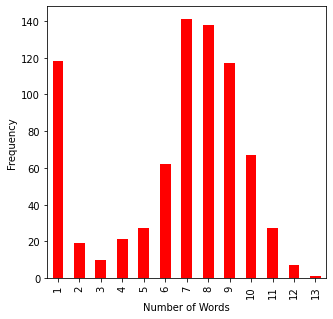

In [ ]:
# plotting the images with a given number of words versus the frequnecy of those type of images in the data
# for example, around 120 images contain text with only 1 word
plt.figure(figsize=(5,5)) # size of the figure to be displayed
# the text column's value in the record is split by spaces to get the number of words
# value_counts sorts by value automatically, sort_index() to sort in ascending by value
data_1.text.str.split(" ").str.len().value_counts().sort_index().plot(kind='bar', color='red')
plt.ylabel("Frequency") # x axis' label - number of images
plt.xlabel("Number of Words") # y axis' label - number of words in the images
plt.show() # display the graph

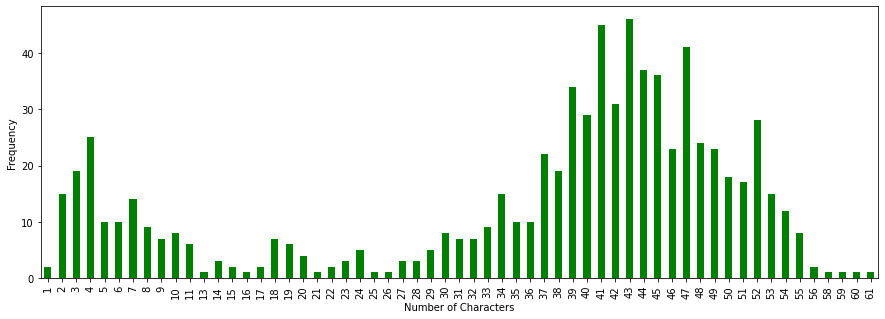

In [ ]:
# plotting the images with a given number of characters versus the frequnecy of those type of images in the data
plt.figure(figsize=(15,5)) # size of the figure to be displayed
# getting the length of the record in characters (including spaces)
# value_counts sorts by value automatically, sort_index() to sort in ascending by value
data_1.text.str.len().value_counts().sort_index().plot(kind='bar',color='green')
plt.ylabel("Frequency") # x axis' label - number of images
plt.xlabel("Number of Characters") # y axis' label - number of characters in the images
plt.show() # display the graph

In [ ]:
# to get the text transcription of the maximum length in the text column
print("The longest string is of", data_1.text.str.len().max(), "characters.")
print("The longest string is of", (data_1.text.str.split(" ")).str.len().max(), "words.")

The longest string is of 61 characters.
The longest string is of 13 words.


#### Visualization
Visualizing sample images and their proper English transcriptions from the dataset.

Ground truth label: October 26th. G.W.


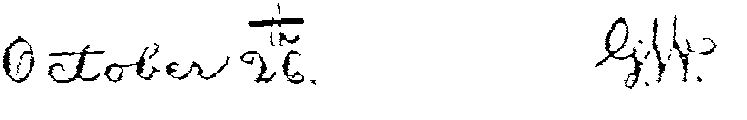

In [ ]:
print("Ground truth label:", data_1['text'][10]) # displaying the ground truth from the text column
Image.open(images_location_1 + data_1['file_name'][10]).convert("RGB") # display the PIL image

Ground truth label: Sir,


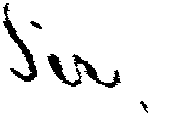

In [ ]:
print("Ground truth label:", data_1['text'][67])
Image.open(images_location_1 + data_1['file_name'][67]).convert("RGB")

Ground truth label: make provisions for you. If any of your men


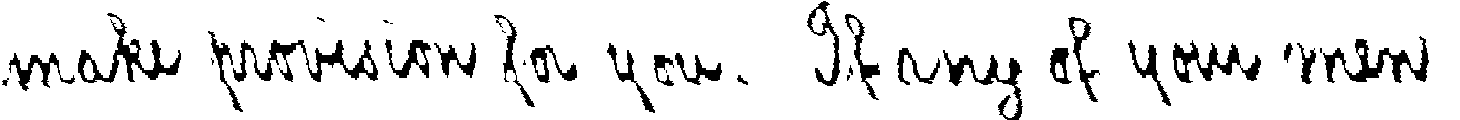

In [ ]:
print("Ground truth label:", data_1['text'][100])
Image.open(images_location_1 + data_1['file_name'][100]).convert("RGB")

Ground truth label: rival of the Vessel with arms, etc. from James


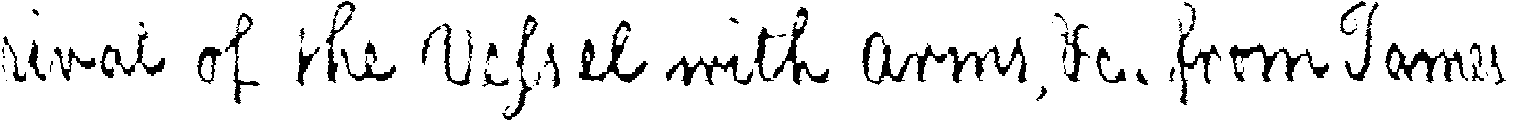

In [ ]:
print("Ground truth label:", data_1['text'][350])
Image.open(images_location_1 + data_1['file_name'][350]).convert("RGB")

Ground truth label: A Return is to be made every mor-


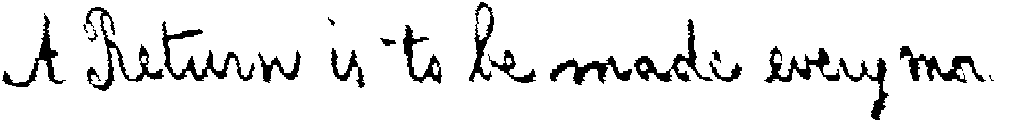

In [ ]:
print("Ground truth label:", data_1['text'][645])
Image.open(images_location_1 + data_1['file_name'][645]).convert("RGB")

### ARDIS Dataset
Created from 15000 Swedish church records from the 19th and 20th centuries.  
Files used are- /Dates/Part I.xlsx for the ground truth and /Dates/Part I for the images.  

#### Pre-processing

In [ ]:
# reading the excel sheet with the file names from 'Image_Left' column and the ground truth in the 'Date' column
data_2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dates/Part I.xlsx')
images_location_2 = '/content/drive/MyDrive/Colab Notebooks/Dates/Part I/' # location of the folder with the images
data_2.head() # to have a glmipse of the first 5 instances in the dataframe

,Image_Left,Image_Right,City,Date,Category
0,v120849.b1210.s114,NaN,Alnö,1900,Födda
1,v120849.b1600.s153,NaN,Alnö,1901,Födda
2,v120849.b1990.s192,T_v120849.b1990.s192,Alnö,1902,Födda
3,v120849.b2340.s227,T_v120849.b2340.s227,Alnö,1903,Födda
4,v120849.b2690.s262,T_v120849.b2690.s262,Alnö,1904,Födda


In [ ]:
# removing the 'Image_Right', 'City', and 'Category' columns as they are not required for our analysis
data_2.drop(['Image_Right', 'City', 'Category'], axis = 1, inplace = True) 
data_2.head() # viewing the data after dropping the columns

,Image_Left,Date
0,v120849.b1210.s114,1900
1,v120849.b1600.s153,1901
2,v120849.b1990.s192,1902
3,v120849.b2340.s227,1903
4,v120849.b2690.s262,1904


In [ ]:
data_2.info() # to examine the types of the data in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Left  2548 non-null   object
 1   Date        2548 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 39.9+ KB


In [ ]:
# Changing the names of the columns in the same dataframe for easy referrence to the columns
data_2.rename(columns={"Image_Left": "file_name", "Date": "text"}, inplace=True)
data_2.columns # to see the column/attribute names

Index(['file_name', 'text'], dtype='object')

In [ ]:
# Changing the data type of the 'text' column
data_2 = data_2.astype({'text': 'str'})
print(data_2.dtypes)

file_name    object
text         object
dtype: object


In [ ]:
# adding 'jpg' to the end of the file names read from the excel sheet 
# so as the contents of the column contain the file names with the extension to refer to the images
# as all images are jpg files
data_2['file_name'] = [x + ".jpg" for x in data_2['file_name']]
print(data_2['file_name'])

0       v120849.b1210.s114.jpg
1       v120849.b1600.s153.jpg
2       v120849.b1990.s192.jpg
3       v120849.b2340.s227.jpg
4       v120849.b2690.s262.jpg
                 ...          
2543      v214662.b680.s64.jpg
2544      v214662.b740.s70.jpg
2545      v214662.b800.s76.jpg
2546      v214662.b930.s89.jpg
2547      v214662.b980.s94.jpg
Name: file_name, Length: 2548, dtype: object


In [ ]:
print("Dimensions of the data_2 (rows, columns):",data_2.shape) # dimensions of the dataframe- (4894 rows, 2 columns)

Dimensions of the data_2 (rows, columns): (2548, 2)


In [ ]:
data_2.isnull().sum() # confirming the dataframe does not contain any NULL values

file_name    0
text         0
dtype: int64

In [ ]:
data_2[data_2['text'] == ''].index # confirming the dataframe does not contain any empty values

Int64Index([], dtype='int64')

In [ ]:
# to check for duplicate entries
data_2[data_2.duplicated()] # or set(data.duplicated()) gives only False

,file_name,text


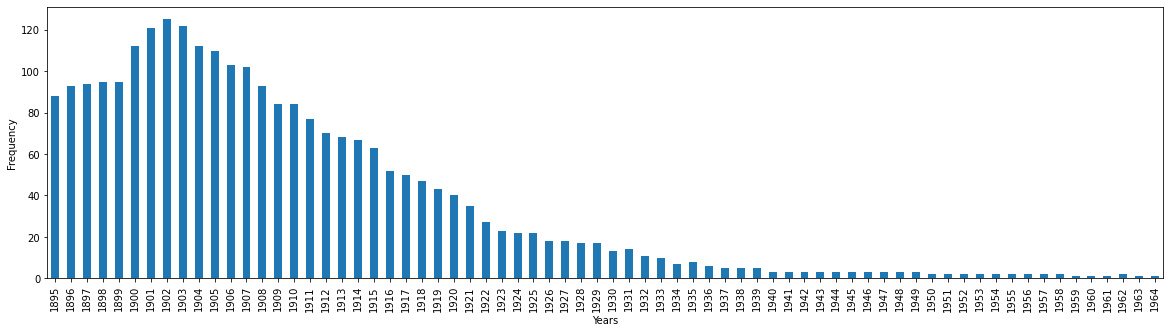

In [ ]:
# displaying all the years in the text and their frequency of appearance in the images
plt.figure(figsize=(20,5)) # size of the figure (width, height)
data_2['text'].value_counts().sort_index().plot(kind='bar') # displaying a bar chart with the years sorted in ascending order
plt.ylabel("Frequency") # x axis' label- frequency of occurence of the years
plt.xlabel('Years') # y axis' label- the years in the images
plt.show() # to display the graph

#### Visualization
Visualizing sample images and their transcriptions from the dataset.

Ground truth label: 1901


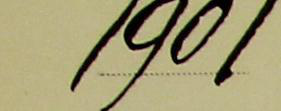

In [ ]:
print("Ground truth label:", data_2['text'][1]) # displaying the ground truth label of the image which would be displayed
Image.open(images_location_2 + data_2['file_name'][1]).convert("RGB") # displaying the PIL image

Ground truth label: 1898


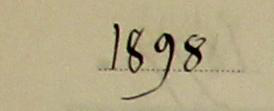

In [ ]:
print("Ground truth label:", data_2['text'][80])
Image.open(images_location_2 + data_2['file_name'][80]).convert("RGB")

Ground truth label: 1906


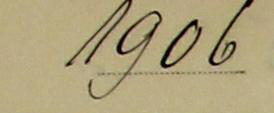

In [ ]:
print("Ground truth label:", data_2['text'][500])
Image.open(images_location_2 + data_2['file_name'][500]).convert("RGB")

Ground truth label: 1917


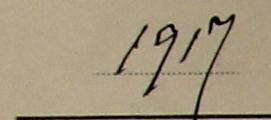

In [ ]:
print("Ground truth label:", data_2['text'][2100])
Image.open(images_location_2 + data_2['file_name'][2100]).convert("RGB")

## Dataset Preparation
Creating Datasets for training, validation and testing.

In [ ]:
# Obtaining a 60-20-20 split for the training, testing and validation sets of data.
train_1, test_1 = train_test_split(data_1, test_size=0.2) # splitting the data_1 dataframe into train and test sets with 80-20 split
train_1, val_1 = train_test_split(train_1, test_size=0.25) # further splitting the training set using 75-25 split for the validation set

# the indices of the three data sets are reset in the same dataframe to freshly start from 0 each
# instead of retaining indices from the original 'data' dataframe and the old indices are avoided being put as another column
train_1.reset_index(drop=True, inplace=True)
val_1.reset_index(drop=True, inplace=True)
test_1.reset_index(drop=True, inplace=True)

In [ ]:
train_2, test_2 = train_test_split(data_2, test_size=0.2) # splitting the data_2 dataframe into train and test datasets
train_2, val_2 = train_test_split(train_2, test_size=0.25) # further splitting for the validatio set

# the indices of the three data sets are reset to 0 and old indices are avoided being put as another column
train_2.reset_index(drop=True, inplace=True)
val_2.reset_index(drop=True, inplace=True)
test_2.reset_index(drop=True, inplace=True)

In [ ]:
class ImageData(Dataset):
    """
    Class representing a custom PyTorch Dataset implementation with the images and their labels
    """
    def __init__(self, data, location, processor):
        """
        Initialization Function 
        """
        self.data = data # the dataframe
        self.location = location # location of the images (path of the folder)
        self.processor = processor # TrOCR processor to use; different for different TrOCR versions.

    def __len__(self):
        """
        Function to get the number of samples in the Dataset
        """
        return len(self.data)

    def __getitem__(self, idx):
        """
        Function/Getter for the contents of a ImageData object at index- idx
        Parameter:
        idx - index at which the contents are to be retrieved
        """
        # to get the image file's name
        img_file = self.location + self.data['file_name'][idx]
        # resizing and normalizing the image to (3, 384, 384) (=(channels, image width and height)) after removing the unnecessary 1 dimension by using squeeze()
        pixels = (self.processor(Image.open(img_file).convert("RGB"), return_tensors="pt").pixel_values).squeeze()
        # encoding the text and getting the input ids or the encoded ground truth values 
        # and all values until after the last value- 200th one, will be made the padding token
        enc_values = self.processor.tokenizer(self.data['text'][idx], 
                                          padding="max_length", 
                                          max_length=80).input_ids

        # encoded ground truth values are made into a tensor to use in computation 
        # while the pad tokens each are set to -100 to be ignored during the computation of the loss
        enc_values = torch.tensor([value if value != self.processor.tokenizer.pad_token_id else -100 for value in enc_values])

        encodings = {"pixel_values": pixels, "labels": enc_values} # the keys are named because the forward pass expects these keys
        return encodings

In [ ]:
# Creating ImageData objects for training, validation and testing sets

# ImageData objects from split data_1
train_df_1 = ImageData(data=train_1, location=images_location_1, processor=processor)
val_df_1 = ImageData(data=val_1, location=images_location_1, processor=processor)
test_df_1 = ImageData(data=test_1, location=images_location_1, processor=processor)

# ImageData objects from split data_2
train_df_2 = ImageData(data=train_2, location=images_location_2, processor=processor)
val_df_2 = ImageData(data=val_2, location=images_location_2, processor=processor)
test_df_2 = ImageData(data=test_2, location=images_location_2, processor=processor)

# Concatenating the ImageData objects created with the two split dataframes
train_df = ConcatDataset([train_df_1,train_df_2])
val_df = ConcatDataset([val_df_1,val_df_2])
test_df = ConcatDataset([test_df_1, test_df_2])

# Creating DataLoaders for training, validation and testing data sets, each element is a batch of size 32
# with data samples and all batches are shuffled at every epoch 
train_dataloader = DataLoader(train_df, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_df, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_df, batch_size=32, shuffle=True)

# Creating DataLoaders for training, validation and testing data sets, each element is a batch of size 32
# with data samples and all batches are shuffled at every epoch 
train_dataloader_1 = DataLoader(train_df_1, batch_size=32, shuffle=True)
val_dataloader_1 = DataLoader(val_df_1, batch_size=32, shuffle=True)
test_dataloader_1 = DataLoader(test_df_1, batch_size=32, shuffle=True)
# Creating DataLoaders for training, validation and testing data sets, each element is a batch of size 32
# with data samples and all batches are shuffled at every epoch 
train_dataloader_2 = DataLoader(train_df_2, batch_size=32, shuffle=True)
val_dataloader_2 = DataLoader(val_df_2, batch_size=32, shuffle=True)
test_dataloader_2 = DataLoader(test_df_2, batch_size=32, shuffle=True)

In [ ]:
# Displaying the sizes of the ImageData objects created
print("Number of training samples in train set of Washington Database:", len(train_df_1))
print("Number of validation samples in validation set of Washington Database:", len(val_df_1))
print("Number of test samples in test set of Washington Database:", len(test_df_1),"\n")

print("Number of training samples in train set of ARDIS Dataset:", len(train_df_2))
print("Number of validation samples in validation set of ARDIS Dataset:", len(val_df_2))
print("Number of test samples in test set of ARDIS Dataset:", len(test_df_2), "\n")

print("Number of total training samples:", len(train_df))
print("Number of total validation samples:", len(val_df))
print("Number of total test samples:", len(test_df))

Number of training samples in train set of Washington Database: 453
Number of validation samples in validation set of Washington Database: 151
Number of test samples in test set of Washington Database: 151 

Number of training samples in train set of ARDIS Dataset: 1528
Number of validation samples in validation set of ARDIS Dataset: 510
Number of test samples in test set of ARDIS Dataset: 510 

Number of total training samples: 1981
Number of total validation samples: 661
Number of total test samples: 661


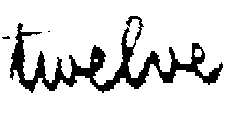

twelve
Dimensions of pixel_values:  torch.Size([3, 384, 384])
Dimensions of labels:  torch.Size([80])
{'pixel_values': tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]]), 'labels': tensor([    0, 17137, 41120,     2,  -100,  -100,  -100,  -100,  -100,  -100,
      

In [ ]:
# Displaying an image and the pixel values and the encoded ground truth text of the first record in the training df from Washington Database
image = Image.open(train_df_1.location + train_1['file_name'][0]).convert("RGB") # display image
display(image)

enc = train_df_1[0] # getting the first insatnce from the ImageData object of data_1
input_ids = enc['labels'] # retrieving the inputs ids of the text
input_ids[input_ids == -100] = processor.tokenizer.pad_token_id # replace all -100 with the pad token
pred = processor.decode(input_ids, skip_special_tokens=True) # decoding the input_ids to plain text

# printing details
print(pred) # the decoded text
print("Dimensions of pixel_values: ",train_df_1[0]['pixel_values'].shape) # dimensions of the pixel_values
print("Dimensions of labels: ",train_df_1[0]['labels'].shape) # dimensions of the labels (one dimensional with the length 200)
print(train_df_1[0]) # displaying the pixel_values and input ids to check out how they look

## Model Training
Training or fine-tuning the model to perform historical charcaters' recognition.

In [ ]:
def decode (pred, actual, processor):
  """
  Function to retrive the strings from the encoded input ids.
  Parameters:
  pred - input ids of the predicted strings
  actual - encoded input ids of the original strings
  processor - the processor to use for decoding
  """
  actual[actual == -100] = processor.tokenizer.pad_token_id # all -100 are pad tokens
  # decoding the actual strings
  dec_actual = processor.batch_decode(actual, skip_special_tokens=True)
  # decoding the predicted strings by skipping on the special tokens (like the cls token)
  dec_pred = processor.batch_decode(pred, skip_special_tokens=True)
  return dec_actual, dec_pred


def metrics (pred, actual, processor):
  """
  Function to compute metrics and necessary measures for computing metrics.
  Parameters:
  pred - input ids of the predicted string/word
  actual - encoded input ids of the original string
  processor - the processor to use for decoding
  """
  dec_actual, dec_pred = decode(pred=pred, actual=actual, processor=processor) # decoding the 2 input_ids lists
  matches = 0 # represents the word matches between the actual and predicted strings
  num_words_pred = 0 # represents the number of predicted words
  num_words_actual = 0 # represents the number of actual words

  # to convert all strings to lowercase to have case-insenstive comparison
  dec_actual = list(map(str.lower,dec_actual))
  dec_pred = list(map(str.lower,dec_pred))

  for i in range(len(dec_actual)): # iterating over the list of decoded image text
    actual1 = dec_actual[i].split() # splitting the original sentence by spaces to retrieve words in that sentence
    pred1 = dec_pred[i].split() # splitting the prediction by spaces to retrieve words in that sentence
    if len(actual1) > 1: # if the text contains more than 1 word
      for j in range(min(len(actual1), len(pred1))): # iterating over the words in the sentences 
      # but only as many as the ones in the shortest of those sequences so that we do not
        if pred1[j] == actual1[j]: # the words decoded are compared
          matches += 1
    else: # if the text contains 1 word
      if pred1 == actual1: # the words are compared
        matches += 1
    num_words_pred += len(pred1) # to count the number of predicted words
    num_words_actual += len(actual1) # to count the number of original words

  cer = cer_metric.compute(predictions=dec_pred, references=dec_actual) # cer metric is calculated for this batch
  return matches, num_words_pred, num_words_actual, cer


In [ ]:
# Changing to GPU just before training to save it for the intensive computations
# to perform execution on gpu if is avaliable else cpu
custom_model.to(device) # to add the custom model to the device (either a CPU or GPU)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=False)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=False)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=76

In [ ]:
def training (epochs, model, processor, optimizer, train_dataloader, val_dataloader):
  """
  Function to perform model training.
  Parameters:
  epochs - number of iterations to run the training function
  model -the TrOCR model to use
  optimizer -optimizer to use which is loaded with the parameters of the model to optimize
  processor - the TrOCR processor to use
  train_dataloader - dataloader with training data
  val_dataloader - dataloader with validation data
  """
  losses = [] # to store the list of losses in each epoch

  # metrics for the entire validation process
  correct_matches = 0 # represents the exact word macthes between the actual and predicted strings
  total_preds = 0 # represents the total number of predicted words
  total_actual = 0 # represents the total number of actual words
  cer_sum = 0 # represents the sum of cer of all batches

  # Training the model on the training data and validating using the validation for the given number of epochs
  for epoch in range(epochs):
    loss_sum = 0.0 # represents the sum of the loss computed after forward propagation of the inputs over each batch
    model.train() # to put in training mode to activate Dropout and BatchNorm layers
    
    # iterating over all the batches of data in the DataLoader with training data 
    # with the pixel values and associated ground truth= keys and values of the ImageData objects
    # tqdm is used for displaying the progress bar covering each of the batches
    for batch in tqdm(train_dataloader):
        # data is used on the same device as the model
        for key,value in batch.items(): # iterating over the keys of the batch dictionary
          batch[key] = value.to(device)
    
        outputs = model(**batch) # the input is passed to the model for forward propagation

        loss = outputs.loss # the loss computed after forward propagation of the inputs
        loss_sum += loss.item() # loss is converted into a number and is on the CPU now

        loss.backward() # backward propagation, calculating gradients
        optimizer.step() # optimizer is run, weights are updated
        optimizer.zero_grad() # resetting the gradients of optimized tensor to 0
    
    final_loss = loss_sum/len(train_dataloader) # loss over the entire epoch (average of all batches)
    losses.append(final_loss) # adding the loss value to the losses list
    print("Loss after epoch" , epoch+1 , "=" , final_loss)
      
    model.eval() # setting to validation mode where Dropout and BatchNorm layers are deactivated
    with torch.no_grad(): # to not calculate gradients
      for batch in tqdm(val_dataloader): # iterating over the validation set
        pixel_values = batch["pixel_values"].to(device) # pixel values is put on the device

        pred = model.generate(pixel_values, max_new_tokens=80) # the prediction is generated from the image's pixel values
        matches, pred_len, actual_len, cer = metrics(pred=pred, actual=batch["labels"], processor=processor) # getting the metrics and other measures
        
        correct_matches += matches # summing the correct exact word matches
        total_preds += pred_len # summing the number of predicted words
        total_actual += actual_len # summing the number of words in the original strings
        cer_sum += cer # summing up the cer for this batch

  # PLotting the loss values after training over the epochs
  plt.title("Losses over the Epochs") # plot's title
  plt.xticks(range(0,epochs+2)) # range of the x axis
  plt.plot(range(1,epochs+1),losses) # plotting the epoch number on the x axis and loss values on the y axis
  plt.ylabel('loss values') # x axis' label
  plt.xlabel('number of epochs')  # y axis' label
  plt.show() # to display the plot

  # printing the computed metrics
  precision = correct_matches/total_preds # number of correct matches / total number of predicted words
  print("Validation Precision:", precision)
  recall = correct_matches/total_actual # number of correct matches / number of words
  f1 = (2*precision*recall)/(precision+recall) # F1 score
  print("Validation Recall:", recall)
  print("Validation F1:", f1)
  print("Validation CER:", cer_sum/(len(val_dataloader)*epochs)) # CER is averaged for all the batches over all the epochs



  0%|          | 0/62 [00:00<?, ?it/s]

Loss after epoch 1 = 0.4808874927581318


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Loss after epoch 2 = 0.20510865964235797


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Loss after epoch 3 = 0.12119549132072396


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Loss after epoch 4 = 0.15045656474126923


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Loss after epoch 5 = 0.09930896841650529


  0%|          | 0/21 [00:00<?, ?it/s]

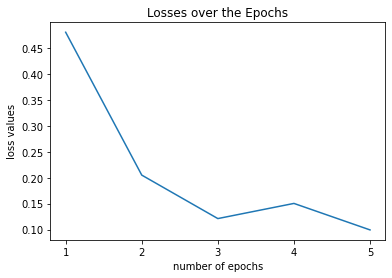

Validation Precision: 0.761139119771086
Validation Recall: 0.7359683794466403
Validation F1: 0.7483421528568558
Validation CER: 0.11362143499108159


In [ ]:
# calling the training function to train the the custom-made HuggingFace model with the given processor on the training data given 
# and running validation for the validation data given, all over the specified number of epochs
training(epochs=5, model=custom_model, processor=processor, optimizer=optimizer, train_dataloader=train_dataloader, val_dataloader=val_dataloader)

In [ ]:
# to save and push the trained model and corresponding processor to the private huggingface repository with the given id
custom_model.save_pretrained(".", push_to_hub=True, repo_id="hist-trocr")
processor.save_pretrained(".", push_to_hub=True, repo_id="hist-trocr")

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

## Inference and Testing
Testing and evaluating the fine-tuned model on the test data set.

### Model Testing

In [ ]:
def testing (model, processor, test_dataloader):
  """
  Function to test the model on the given data
  Parameters:
  epochs - number of iterations to run the training function
  model -the TrOCR model to use
  processor - the TrOCR processor to use
  test_dataloader - dataloader with testing data
  """
  correct_matches = 0 # represents the exact word matches between the actual and predicted strings
  total_preds = 0 # represents the total number of predicted words
  total_actual = 0 # represents the total number of actual words
  actual_preds = 0 # represents the total number of original words
  cer_sum = 0 # represents the sum of cer of all batches

  # iterating all the batches of data in the DataLoader with testing data 
  # with the pixel values and associated ground truth- keys and values of the WordData objects
  # tqdm is used for displaying the progress bar, covers each of the batches
  for batch in tqdm(test_dataloader):
      # putting the values in the batch on the same device as the model
      pixel_values = batch["pixel_values"].to(device)
      text = batch["labels"].to(device)
      
      pred = model.generate(pixel_values, max_new_tokens=100) # getting the prediction for the given image's pixels
      matches, pred_len, actual_len, cer = metrics(pred=pred, actual=text, processor=processor) # computing the metrics and other related values

      correct_matches += matches # summing the correct exact word matches
      total_preds += pred_len # summing the number of predicted words
      total_actual += actual_len # summing the number of predicted words
      cer_sum += cer # cer metric is summed for this batch

  # printing the values of the metrics on the test data
  print("On test set:")
  precision = correct_matches/total_preds
  print("Precision:", precision)
  recall = correct_matches/total_actual
  print("Recall:", recall)
  print("F1:", (2*precision*recall)/(precision+recall)) # F1 Score
  print("CER:", cer_sum/len(test_dataloader)) # represents the cer acccumulated over the batches

In [ ]:
# testing(model=model, processor=processor, test_dataloader=test_dataloader) # calling the testing function to test the given model with processor on the given test data
testing(model= custom_model, processor=processor, test_dataloader=test_dataloader) # used at later stages of testing when the already trained model pushed to Huggingface was directly imported

  0%|          | 0/21 [00:00<?, ?it/s]

On test set:
Precision: 0.8889679715302491
Recall: 0.8789584799437016
F1: 0.883934890304317
CER: 0.060624336188487296


### Inference on individual images

In [ ]:
average_time_taken = 0 # represents average time taken to convert a given image to pixels and generate text from the pixels is
def inference_on_image(image):
  """
  To read an image and output the text in the image.
  Parameters:
    image - image in PIL format 
  """
  start = time.time() # time at the start of the process
  pixel_values = (processor(image, return_tensors="pt").pixel_values) # pixel values of the input
  pred = custom_model.generate(pixel_values.to(device), max_new_tokens=100) # generate the prediction as input_ids
  dec_pred = processor.batch_decode(pred, skip_special_tokens=True)[0] # convert input_ids to English text 
  time_taken = time.time() - start # total time taken for the inference
  return dec_pred, time_taken

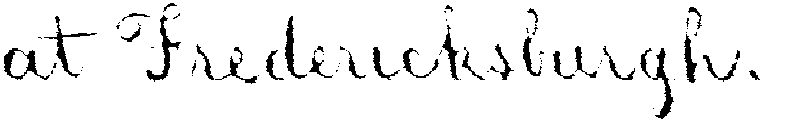

Predicted text: at Fredericksburgh.


In [ ]:
image1 = Image.open(test_df_1.location + test_1['file_name'][0]).convert("RGB") # opening the image as a PIL image
display(image1) # to display the image
text, time_taken = inference_on_image(image1) # to read the image from the text and to get the time taken for this inference
average_time_taken+= time_taken # the time is summed up to calculate the average time taken in these 5 inference cells
print("Predicted text:",text) # to print the prediction

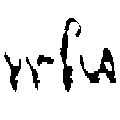

Predicted text: who


In [ ]:
image1 = Image.open(test_df_1.location + test_1['file_name'][50]).convert("RGB") # opening the image as a PIL image
display(image1) # to display the image
text, time_taken = inference_on_image(image1) # to read the image from the text
average_time_taken+= time_taken # the time is summed up to calculate the average time taken in these 5 inference cells
print("Predicted text:",text) # to print the prediction

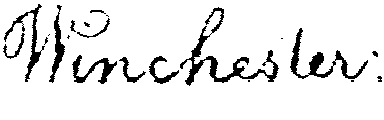

Predicted text: Winchester


In [ ]:
image1 = Image.open(test_df_1.location + test_1['file_name'][97]).convert("RGB") # opening the image as a PIL image
display(image1) # to display the image
text, time_taken = inference_on_image(image1) # to read the image from the text
average_time_taken+= time_taken # the time is summed up to calculate the average time taken in these 5 inference cells
print("Predicted text:",text) # to print the prediction

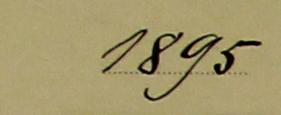

Predicted text: 1895


In [ ]:
image1 = Image.open(test_df_2.location + test_2['file_name'][12]).convert("RGB") # opening the image as a PIL image
display(image1) # to display the image
text, time_taken = inference_on_image(image1) # to read the image from the text
average_time_taken+= time_taken # the time is summed up to calculate the average time taken in these 5 inference cells
print("Predicted text:",text) # to print the prediction

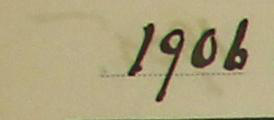

Predicted text: 1906


In [ ]:
image1 = Image.open(test_df_2.location + test_2['file_name'][75]).convert("RGB") # opening the image as a PIL image
display(image1) # to display the image
text, time_taken = inference_on_image(image1) # to read the image from the text
average_time_taken+= time_taken # the time is summed up to calculate the average time taken in these 5 inference cells
print("Predicted text:",text) # to print the prediction

In [ ]:
print("The average time taken to read text from an image is", average_time_taken/5, "seconds") # Around 0.15 secongs with GPU and runtime or 10 seconds without

The average time taken to read text from an image is 0.12282204627990723 seconds


## Model and Data Experimentation
Trying out different models and datasets to use with the fine-tuned model or to compare against it.

### Testing the model on images from the IAM Handwriting Database
The ground truth associated with each of the image files are in a text file which is loaded. This is a benchmark dataset ([data linked here](https://drive.google.com/drive/folders/1n7ePKEf4v1Z_B_w99dQnl6ij7giEPjnf?usp=share_link)) and it does not have null, empty, and duplicate values, however, this has been checked again. This has 2915 images but to keep the testing conditions similar to what was done with in the previous section, 661 random images from these are sampled to be used in the testing process.  
Files used are- IAM/gt_test.txt for the ground truth and IAM/image for the data.  

In [ ]:
# reading the text file associated with the images' names and ground truth from the IAM Handwriting Database
data_iam = pd.read_fwf('/content/drive/MyDrive/Colab Notebooks/IAM/gt_test.txt', header=None)
images_location_iam = '/content/drive/MyDrive/Colab Notebooks/IAM/image/' # path of images associated with this dataset
data_iam.head() # having a look at samples in the dataframe

,0,1,2
0,c04-110-00.jpg,Become a success with a disc and hey presto ! ...,NaN
1,c04-110-01.jpg,"assuredness "" Bella Bella Marie "" ( Parlophone...",.
2,c04-110-02.jpg,I don't think he will storm the charts with th...,NaN
3,c04-110-03.jpg,"CHRIS CHARLES , 39 , who lives in Stockton-on-...",NaN
4,c04-116-00.jpg,He is also a director of a couple of garages ....,NaN


In [ ]:
print("Dimensions of the dataframe: ",data_iam.shape) # shape of the dataframe; given as (rows,columns)

Dimensions of the dataframe:  (2915, 3)


In [ ]:
data_iam.drop([2], axis = 1, inplace = True) # dropping the column named '2' as it only contains NaNs and also is not required
data_iam.rename(columns={0: "file_name", 1: "text"}, inplace=True) # renaming the columns for better readbility
print(data_iam[data_iam['file_name'].str.endswith('jpg')].shape) # to ensure all file names end with jpg

(2695, 2)


In [ ]:
# most file names end with jpg but some end with jp and such ones are modified to be jpg
data_iam['file_name'] = data_iam['file_name'].apply(lambda x: x + 'g' if x.endswith('jp') else x)
# getting a random sample of 661 images so that this size matches with that of the 
# test data size from the Washington Database and ARDIS Dataset

data_iam = data_iam.sample(661)
data_iam.reset_index(drop=True, inplace=True) # resetting the indices of the dataset after the sample is chosen
data_iam.head() # glimpse of the dataframe after all the modifications

,file_name,text
0,g04-072-04.jpg,the Committee . We had a splendid body of loca...
1,n02-104-05.jpg,if I had absolutely insisted on sailing at the
2,n02-151-10.jpg,on the estate was a major error :
3,d01-019-02.jpg,present state of the Gospel is the result of a...
4,p01-147-05.jpg,in a huddle upon an upturned wheelbarrow .


In [ ]:
print("Dimensions of the dataframe: ",data_iam.shape) # shape of the dataframe; given as (rows,columns)

Dimensions of the dataframe:  (661, 2)


In [ ]:
data_iam.isnull().sum() # confirming the dataframe does not contain any NULL values

file_name    0
text         0
dtype: int64

In [ ]:
data_iam[data_iam['text'] == ''].index # confirming the dataframe does not contain any empty values

Int64Index([], dtype='int64')

In [ ]:
# to check for duplicate entries
data_iam[data_iam.duplicated()] # or set(data.duplicated()) gives only False

,file_name,text


In [ ]:
# Creating ImageDataset object for testing sets
test_df_iam = ImageData(data=data_iam, location=images_location_iam, processor=processor)
test_dataloader_iam = DataLoader(test_df_iam, batch_size=32, shuffle=True)

#### Testing on the Fine-tuned model

In [ ]:
# calling the testing function to test the given model with processor on the given test data from the IAM Handwriting Databse
testing(model=custom_model, processor=processor, test_dataloader=test_dataloader_iam)

  0%|          | 0/19 [00:00<?, ?it/s]

On test set:
Precision: 0.6949439390734081
Recall: 0.7073643410852714
F1: 0.7010991356312027
CER: 0.13269610405889


#### Testing with the original TrOCR model

In [ ]:
# calling the training function to train the given model with the given processor on the entire training data
# and running validation on the entire validation data , all over the specified number of epochs
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")
model = initialize_model(model) # configuring the model
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
model.to(device) # loading on the CPU/GPU

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=False)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=False)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=76

In [ ]:
# calling the testing function to test the given model with processor on the entire test data
testing(model=model, processor=processor, test_dataloader=test_dataloader_iam)

  0%|          | 0/21 [00:00<?, ?it/s]

On test set:
Precision: 0.8661176019919555
Recall: 0.8687800192122959
F1: 0.8674467676961444
CER: 0.029770408075687396


### Training with each of the datasets
The base model is trained for 5 epochs only and tested, on the individual datasets to compare its performance on them. However, the custom-model has been trained for many epochs over time and as a result, for fair comparison, the base model is trained on the entire dataset for 5 epochs and then tested. This is to test the model's performance when there are more samples and when varied samples are used.  
The models are initialized thrice so that they are not re-trained in further steps but are freshly tested.


In [ ]:
# Initializing the model and optimizer
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")
model = initialize_model(model) # configuring the model
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
model.to(device) # loading on the CPU/GPU

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=False)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=False)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=76

In [ ]:
testing(model=model, processor=processor, test_dataloader=test_dataloader) # to test the model on the data without training

  0%|          | 0/21 [00:00<?, ?it/s]

On test set:
Precision: 0.34665166010129433
Recall: 0.43349753694581283
F1: 0.38524077548467794
CER: 0.33805082930037533


  0%|          | 0/62 [00:00<?, ?it/s]

Loss after epoch 1 = 2.1072964723552428


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Loss after epoch 2 = 0.9301930810174635


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Loss after epoch 3 = 0.5024333793309427


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Loss after epoch 4 = 0.2604205757379532


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Loss after epoch 5 = 0.19367730623531726


  0%|          | 0/21 [00:00<?, ?it/s]

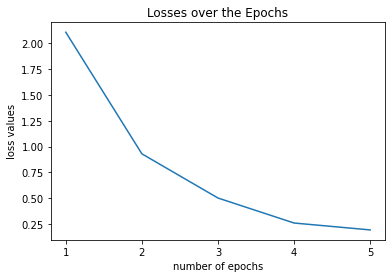

Validation Precision: 0.654300168634064
Validation Recall: 0.6162806088682992
Validation F1: 0.634721559539227
Validation CER: 0.2165223254914739


In [ ]:
# calling the training function to train the given model with the given processor on the entire training data
# and running validation on the entire validation data , all over the specified number of epochs
training(epochs=5, model=model, processor=processor, optimizer=optimizer, train_dataloader=train_dataloader, val_dataloader=val_dataloader) # training the model

In [ ]:
# calling the testing function to test the given model with processor on the entire test data
testing(model=model, processor=processor, test_dataloader=test_dataloader)

  0%|          | 0/21 [00:00<?, ?it/s]

On test set:
Precision: 0.6688790560471977
Recall: 0.6382828993666432
F1: 0.6532229024126756
CER: 0.18149894814567094


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/15 [00:00<?, ?it/s]

Loss after epoch 1 = 5.632533613840739


  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1186: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(


  0%|          | 0/15 [00:00<?, ?it/s]

Loss after epoch 2 = 2.628807767232259


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Loss after epoch 3 = 1.132412842909495


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Loss after epoch 4 = 0.45874431828657786


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Loss after epoch 5 = 0.6585673868656159


  0%|          | 0/5 [00:00<?, ?it/s]

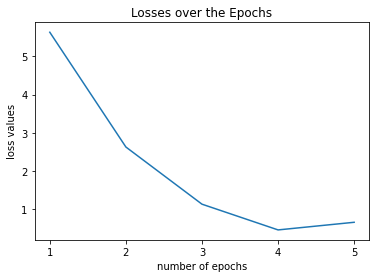

Validation Precision: 0.4907022533362503
Validation Recall: 0.4463681592039801
Validation F1: 0.46748645268862027
Validation CER: 0.321241659376546


In [ ]:
# calling the training function to train the given model with the given processor on the training data from data_1 
# and running validation on the validation data from data_1 , all over the specified number of epochs
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")
model = initialize_model(model)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
model.to(device)
training(epochs=5, model=model, processor=processor, optimizer=optimizer, train_dataloader=train_dataloader_1, val_dataloader=val_dataloader_1)

In [ ]:
# calling the testing function to test the given model with processor on the given test data from data_1
testing(model=model, processor=processor, test_dataloader=test_dataloader_1)

  0%|          | 0/5 [00:00<?, ?it/s]

On test set:
Precision: 0.6512935883014623
Recall: 0.5676470588235294
F1: 0.606600314300681
CER: 0.2361914964433504


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/48 [00:00<?, ?it/s]

Loss after epoch 1 = 0.46742581830282387


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Loss after epoch 2 = 0.05399006216127115


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Loss after epoch 3 = 0.03522277074322725


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Loss after epoch 4 = 0.023960889087902615


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Loss after epoch 5 = 0.013859269304399882


  0%|          | 0/16 [00:00<?, ?it/s]

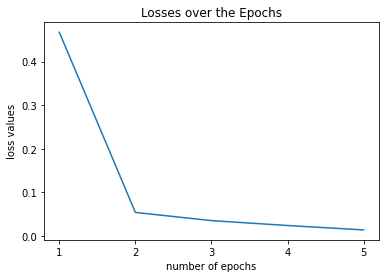

Validation Precision: 0.9435294117647058
Validation Recall: 0.9435294117647058
Validation F1: 0.9435294117647058
Validation CER: 0.015104166666666669


In [ ]:
# calling the training function to train the given model with the given processor on the training data from data_2
# and running validation on the validation data from data_2, all over the specified number of epochs
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")
model = initialize_model(model)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
model.to(device)
training(epochs=5, model=model, processor=processor, optimizer=optimizer, train_dataloader=train_dataloader_2, val_dataloader=val_dataloader_2)

In [ ]:
# calling the testing function to test the given model with processor on the given test data from data_2
testing(model=model, processor=processor, test_dataloader=test_dataloader_2)

  0%|          | 0/16 [00:00<?, ?it/s]

On test set:
Precision: 0.9647058823529412
Recall: 0.9647058823529412
F1: 0.9647058823529412
CER: 0.01025390625


### TrOCR handwritten: base v/s small v/s large
This is to test how each of the model configurations work with the given data when trained for 2 epochs and then tested. This will aid in the comparison of the three versions created, all of which have been trained on the IAM Handwrting Database 

#### Using trocr-small-handwritten

In [ ]:
# required for the decoder; not installing gives "You need to have sentencepiece installed to convert a slow tokenizer to a fast one" error
!pip install sentencepiece
# using the trocr_small_handwritten model and processor
processor1 = TrOCRProcessor.from_pretrained("microsoft/trocr-small-handwritten")
model1 = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-small-handwritten")
model1 = initialize_model(model1)
optimizer = torch.optim.AdamW(model1.parameters(), lr=5e-5)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.8 MB/s eta 0:00:00


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-small-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# displaying the processor's details to compare with the ones of the original (trocr_base_handwritten) model
print(processor1.image_processor)
print(processor1.image_processor.model_input_names)
print(processor1.tokenizer)
print(processor1.tokenizer.model_input_names)

DeiTImageProcessor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": false,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "DeiTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 384,
    "width": 384
  }
}

['pixel_values']
XLMRobertaTokenizerFast(name_or_path='microsoft/trocr-small-handwritten', vocab_size=64002, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True)})
['input_ids', 'attention_mask']


In [ ]:
# Creating ImageDataset objects for training, validation and testing sets (similar to what was done in the Dataset Preparation Section earlier)
# ImageData objects for the split dataframes of data_1 with the trocr_small_handwritten processor
train_df_1 = ImageData(data=train_1, location=images_location_1, processor=processor1)
val_df_1 = ImageData(data=val_1, location=images_location_1, processor=processor1)
test_df_1 = ImageData(data=test_1, location=images_location_1, processor=processor1)
# ImageData objects for the split dataframes of data_2
train_df_2 = ImageData(data=train_2, location=images_location_2, processor=processor1)
val_df_2 = ImageData(data=val_2, location=images_location_2, processor=processor1)
test_df_2 = ImageData(data=test_2, location=images_location_2, processor=processor1)
# Concatenated ImageData objects for the training, validation, and test sets
train_df = ConcatDataset([train_df_1,train_df_2])
val_df = ConcatDataset([val_df_1,val_df_2])
test_df = ConcatDataset([test_df_1, test_df_2])

# Creating DataLoaders for training, validation and testing data sets, each element is a batch of size 32
# with data samples and all batches are shuffled at every epoch 
train_dataloader = DataLoader(train_df, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_df, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_df, batch_size=32, shuffle=True)

  0%|          | 0/62 [00:00<?, ?it/s]

Loss after epoch 1 = 1.8697340288049271


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Loss after epoch 2 = 1.792472497109444


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Loss after epoch 3 = 1.6919680064724338


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Loss after epoch 4 = 1.6629325295648267


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Loss after epoch 5 = 1.56108731608237


  0%|          | 0/21 [00:00<?, ?it/s]

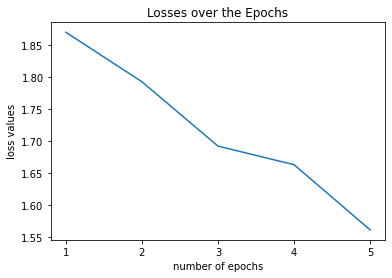

Validation Precision: 0.30669740043539506
Validation Recall: 0.33217753120665744
Validation F1: 0.3189293561488781
Validation CER: 0.615729709334177


In [ ]:
# calling the training function to train the given model with the given processor on the training data given 
# and running validation for the validation data given, all over the specified number of epochs
model1.to(device)
training(epochs=5, model=model1, processor=processor1, optimizer=optimizer, train_dataloader=train_dataloader, val_dataloader=val_dataloader)

In [ ]:
# calling the testing function to test the given model with processor on the given test data
testing(model=model1, processor=processor1, test_dataloader=test_dataloader)

  0%|          | 0/21 [00:00<?, ?it/s]

On test set:
Precision: 0.3253333333333333
Recall: 0.3164721141374838
F1: 0.32084155161078237
CER: 0.565970332993805


#### Using trocr-large-handwritten

In [ ]:
# using the trocr_large_handwritten model and processor
processor2 = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten")
model2 = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")
model2 = initialize_model(model2)
optimizer = torch.optim.AdamW(model2.parameters(), lr=5e-5)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# displaying the processor's details to compare with the ones of the original (trocr_base_handwritten) model
print(processor2.image_processor)
print(processor2.image_processor.model_input_names)
print(processor2.tokenizer)
print(processor2.tokenizer.model_input_names)

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 384,
    "width": 384
  }
}

['pixel_values']
RobertaTokenizerFast(name_or_path='microsoft/trocr-large-handwritten', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'sep_token': AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'pad_token': AddedToken("<pad>", rstrip=False, lstrip=False, si

In [ ]:
# Creating ImageDataset objects for training, validation and testing sets (similar to what was done in the Dataset Preparation Section earlier)
# ImageData objects for the split dataframes of data_1 with the trocr_large_handwritten processor
train_df_1 = ImageData(data=train_1, location=images_location_1, processor=processor2)
val_df_1 = ImageData(data=val_1, location=images_location_1, processor=processor2)
test_df_1 = ImageData(data=test_1, location=images_location_1, processor=processor2)
# ImageData objects for the split dataframes of data_2
train_df_2 = ImageData(data=train_2, location=images_location_2, processor=processor2)
val_df_2 = ImageData(data=val_2, location=images_location_2, processor=processor2)
test_df_2 = ImageData(data=test_2, location=images_location_2, processor=processor2)
# Concatenated ImageData objects for the training, validation, and test sets
train_df = ConcatDataset([train_df_1,train_df_2])
val_df = ConcatDataset([val_df_1,val_df_2])
test_df = ConcatDataset([test_df_1, test_df_2])

# Creating DataLoaders for training, validation and testing data sets, each element is a batch of size 32
# with data samples and all batches are shuffled at every epoch 
train_dataloader = DataLoader(train_df, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_df, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_df, batch_size=32, shuffle=True)

In [ ]:
# calling the training function to train the given model with the given processor on the training data given 
# and running validation for the validation data given, all over the specified number of epochs
model2.to(device)
training(epochs=5, model=model2, processor=processor2, optimizer=optimizer, train_dataloader=train_dataloader, val_dataloader=val_dataloader)

  0%|          | 0/62 [00:00<?, ?it/s]

OutOfMemoryError: ignored

In [ ]:
# calling the testing function to test the given model with processor on the given test data
testing(model=model2, processor=processor2, test_dataloader=test_dataloader)

## Gradio Demo Creation 
The code used to create a Gradio model.
This code in used in app.py file in HuggingFace repo to deploy the model as a Space.

In [ ]:
title = "Hist-TrOCR" # title of the space
# description to be displayed to the users below the title
description = "Interactive demo of Hist-TrOCR, a fine-tuned version of Microsoft's TrOCR which is an end-to-end transformer model used for recognition of text from single-line or word images. It has been fine-tuned on historical text images. Upload an image or use one of the sample images below and click 'submit' to get the transcriptions. Results may take a few seconds to show up."

# Creating a Gradio interface with the pixel reading and text reading function, expected input and output type, title, description
# it is also launched to create a link that is shareable (so not local).
# This is just a demo of creating the Space, the code to deploy the space on HuggingFace does not have an explicit share option.
gr.Interface(fn=inference_on_image, # function from the Inference section
                     inputs=gr.inputs.Image(type="pil"), 
                     outputs=gr.outputs.Textbox(),
                     title=title,
                     description=description).launch(debug=True, share=True)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://31369ba3-fe72-4ba5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1273: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 32 (`generation_config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1273: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 32 (`generation_config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://31369ba3-fe72-4ba5.gradio.live
